In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/mnt/data/Sentiment_results/tenghao/dataset/UserDataset[partParty].csv")
# data of 2 platforms and 3 topics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821737 entries, 0 to 1821736
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   author       object 
 1   text         object 
 2   toxicity     float64
 3   pessimism    float64
 4   core_status  object 
 5   party        object 
 6   Theme        object 
 7   Platform     object 
 8   WordEntorpy  float64
dtypes: float64(3), object(6)
memory usage: 125.1+ MB


In [ ]:
from scipy.stats import mannwhitneyu
def Mann_Whitney_U_test(srs1:pd.Series, srs2:pd.Series):
    
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='less')
    if p_value < 0.05:
        print(f"U: {u_statistic}, P: {p_value}", end=', ')
        print('The former is significantly smaller overall than the latter.') #The former is significantly smaller overall than the latter.
        return
    
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='greater')
    if p_value < 0.05:
        print(f"U: {u_statistic}, P: {p_value}", end=', ')
        print('The former is significantly larger overall than the latter.') #The former is significantly larger overall than the latter.
        return
    
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='two-sided')
    print(f"U: {u_statistic}, P: {p_value}", end=', ')
    if p_value < 0.05:
        print('There is a significant difference between the two sets of data.')
    else:
        print('There is no significant difference between the two sets of data.')


from scipy.stats import ttest_ind
def t_test(srs1:pd.Series, srs2:pd.Series):
    '''t test'''
    t_statistic, p_value = ttest_ind(srs1, srs2)
    print(f"T-statistic.: {t_statistic}, P-Value: {p_value}", end=', ')
    if p_value < 0.05:
        if t_statistic > 0:
            print('The mean of the former is significantly larger than that of the latter.')
        else:
            print('The mean of the former is significantly smaller than that of the latter.')
    else:
        print('There is no significant difference between the two sets of data.')


In [4]:
df_Twitter

,author,text,toxicity,pessimism,core_status,party,Theme,Platform,WordEntorpy
0,000000000xxxxx,"""If there's no such thing as facts, why does T...",0.630852,0.040075,2 core,Democrats,POTUS2016,Twitter,8.018241
1,000120o,When Donald Trump attacks the media as “fake ...,0.254629,0.059299,2 core,Democrats,POTUS2016,Twitter,6.378363
2,00023one,Donald Trump tweets: The 'fake news media' is ...,0.285487,0.056911,2 core,Democrats,POTUS2016,Twitter,4.802555
3,000Dillon000,"Give me a break: Brian Williams, disgraced fak...",0.368677,0.035116,2 core,Republicans,POTUS2016,Twitter,6.520862
4,000JohnPaul000,Trump lied 80 times in his first 30 days in of...,0.386017,0.083581,2 core,Democrats,POTUS2016,Twitter,5.240218
...,...,...,...,...,...,...,...,...,...
1581834,zzachammer,QAnon is a threat to our democratic institutio...,0.283127,0.114302,1 degree,NaN,QAnon,Twitter,4.810673
1581835,zzh404520,"Our own federal gov’t gave $150,000-$350,000 o...",0.209735,0.070343,1 degree,NaN,QAnon,Twitter,5.044394
1581836,zzippycorgi11,Disinformation is highly coordinated.\nWith an...,0.096118,0.048731,1 degree,NaN,QAnon,Twitter,4.221928
1581837,zzkkcarol,#US disinformation campaign. \nNearly 30 group...,0.153245,0.052078,1 degree,NaN,QAnon,Twitter,5.070167


In [ ]:
# Toxicity does not distinguish between topical toxicity and pessimism
df_Twitter = df[(df['Platform'] == 'Twitter')]
df_Reddit = df[(df['Platform'] == 'Reddit')]

In [7]:
plat = df_Twitter['Platform'].value_counts()
plat

Twitter    1581839
Name: Platform, dtype: int64

In [3]:
df_Twitter_Dem = df_Twitter[(df_Twitter['party'] == 'Democrats')]
df_Twitter_Rep = df_Twitter[(df_Twitter['party'] == 'Republicans')]

In [5]:
party_core = df_Twitter_Dem['core_status'].value_counts()
party_core

1 degree    362998
2 core      291146
Name: core_status, dtype: int64

In [6]:
party_core2 = df_Twitter_Rep['core_status'].value_counts()
party_core2

2 core      184573
1 degree    130575
Name: core_status, dtype: int64

In [14]:
df_Reddit_Dem = df_Reddit[(df_Reddit['party'] == 'Democrats')]
df_Reddit_Rep = df_Reddit[(df_Reddit['party'] == 'Republicans')]

In [12]:
a = df_Reddit['party'].value_counts()
a

Republicans    123550
Democrats       94996
Name: party, dtype: int64

In [9]:
party_core = df_Reddit_Dem['core_status'].value_counts()
party_core

1 degree    90894
2 core       4102
Name: core_status, dtype: int64

In [15]:
party_core2 = df_Reddit_Rep['core_status'].value_counts()
party_core2

1 degree    117678
2 core        5872
Name: core_status, dtype: int64

In [ ]:
df_Twitter_Dem = df_Twitter[(df_Twitter['party'] == 'Democrats')]
df_Twitter_Rep = df_Twitter[(df_Twitter['party'] == 'Republicans')]
df_Twitter_Dem = df_Twitter_Dem.dropna(subset=['toxicity', 'pessimism'])
df_Twitter_Rep = df_Twitter_Rep.dropna(subset=['toxicity', 'pessimism'])
'''
# Comparison of toxicity between users of the two parties within the platform.
print(f"Compare the toxicity of users from both parties on Twitter.:")
Mann_Whitney_U_test(df_Twitter_Dem['toxicity'], df_Twitter_Rep['toxicity'])

print(f"Compare the pessimistic sentiment of users from both parties on Twitter:")
Mann_Whitney_U_test(df_Twitter_Dem['pessimism'], df_Twitter_Rep['pessimism'])
'''

比较Twitter两党用户的毒性:
U统计量: 86702031455.0, P值: 0.0, 前者整体显著比后者小。
比较Twitter两党用户的悲观情绪:
U统计量: 119819952140.0, P值: 0.0, 前者整体显著比后者大。


In [ ]:
df_Reddit_Dem = df_Reddit[(df_Reddit['party'] == 'Democrats')]
df_Reddit_Rep = df_Reddit[(df_Reddit['party'] == 'Republicans')]
df_Reddit_Dem = df_Reddit_Dem.dropna(subset=['toxicity', 'pessimism'])
df_Reddit_Rep = df_Reddit_Rep.dropna(subset=['toxicity', 'pessimism'])

# Comparison of user toxicity between the two parties within the platform
print(f"Compare the toxicity of Reddit's bipartisan users:")
Mann_Whitney_U_test(df_Reddit_Dem['toxicity'], df_Reddit_Rep['toxicity'])

print(f"Compare the pessimism of Reddit's bipartisan users:")
Mann_Whitney_U_test(df_Reddit_Dem['pessimism'], df_Reddit_Rep['pessimism'])

比较Reddit两党用户的毒性:
U统计量: 5567927856.5, P值: 2.0765128500738955e-75, 前者整体显著比后者小。
比较Reddit两党用户的悲观情绪:
U统计量: 6266358666.5, P值: 2.241153386590447e-193, 前者整体显著比后者大。


In [ ]:
# Data filtering
Twitter_2016 = df[(df['Platform'] == 'Twitter') & (df['Theme'] == 'POTUS2016')]
Twitter_2020 = df[(df['Platform'] == 'Twitter') & (df['Theme'] == 'POTUS2020')]
Twitter_QAnon = df[(df['Platform'] == 'Twitter') & (df['Theme'] == 'QAnon')]
Reddit_2016 = df[(df['Platform'] == 'Reddit') & (df['Theme'] == 'POTUS2016')]
Reddit_2020 = df[(df['Platform'] == 'Reddit') & (df['Theme'] == 'POTUS2020')]
Reddit_QAnon = df[(df['Platform'] == 'Reddit') & (df['Theme'] == 'QAnon')]

/home/wenlu/anaconda3/envs/reddit/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


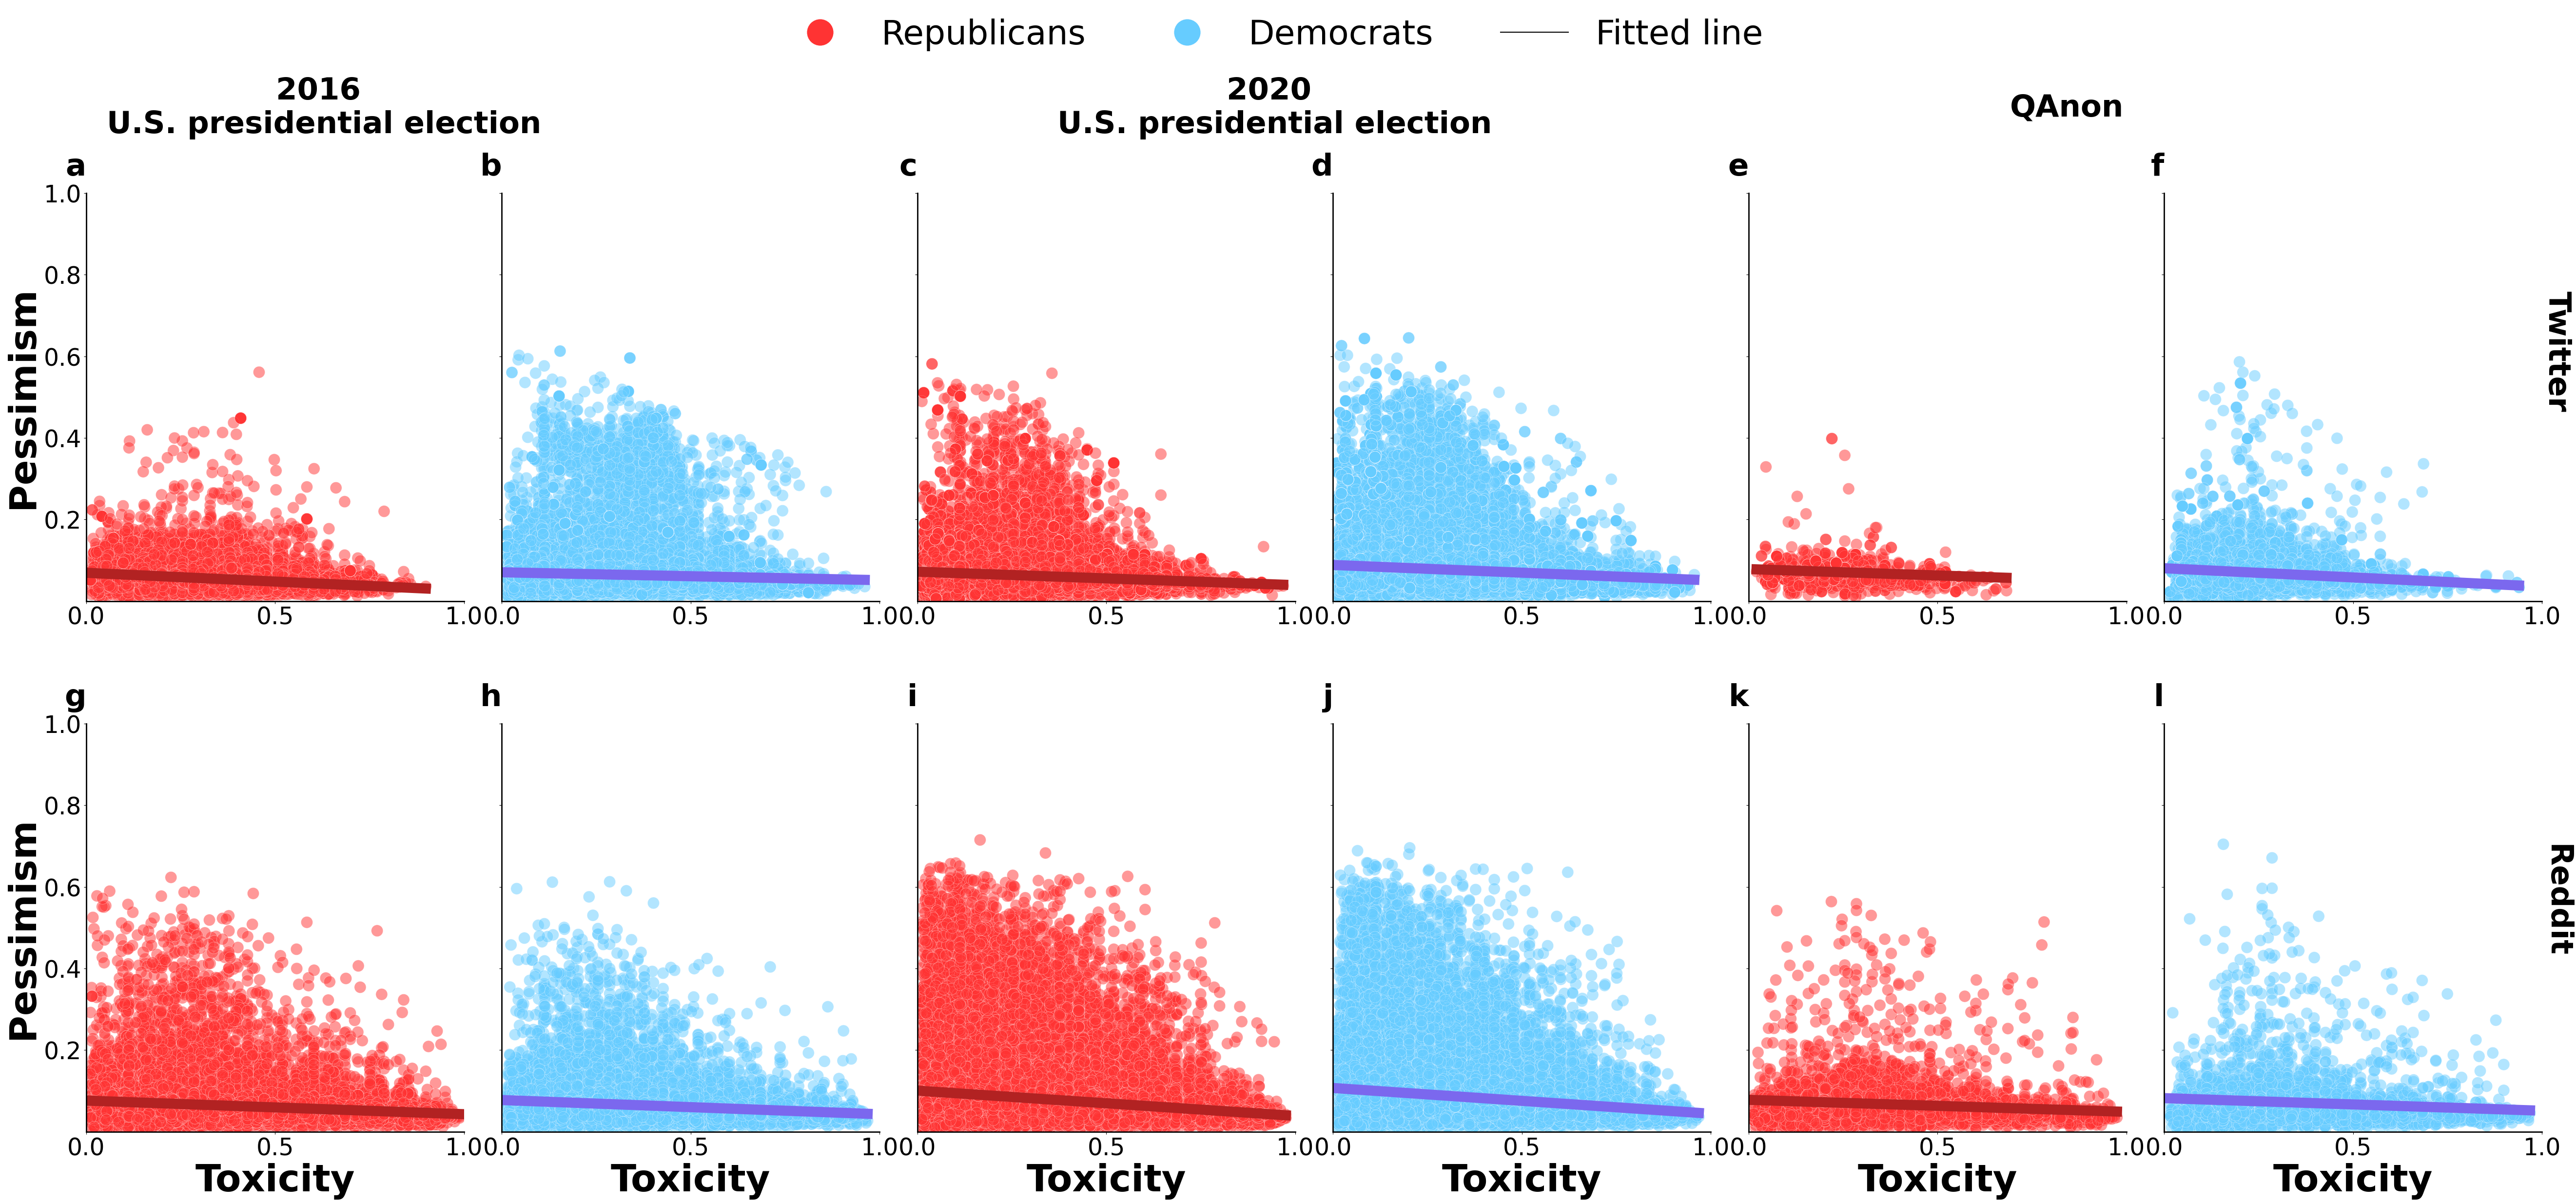

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D
# Define the color of the legend and increase transparency (RGBA format) 250 128 114 123,104,238
colors = {'Democrats': (123/255, 104/255, 238/255, 1),  
          'Republicans': (178/255, 34/255, 34/255, 1)}  


party_colors = {'Democrats': '#66CCFF', 'Republicans': '#FF3333'}

datasets = [Twitter_2016, Twitter_2020, Twitter_QAnon, Reddit_2016, Reddit_2020, Reddit_QAnon]
titles = ["2016 \nU.S. presidential election", "2020 \nU.S. presidential election", "QAnon", " ", " ", " "]

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']


fig, axes = plt.subplots(2, 6, figsize=(65, 25), sharey= True)  
axes = axes.flatten()  
plt.subplots_adjust(wspace=0.1, hspace=0.3) #Adjust the spacing between each other


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Republicans', markerfacecolor=party_colors['Republicans'], markersize=40),
    Line2D([0], [0], marker='o', color='w', label='Democrats', markerfacecolor=party_colors['Democrats'], markersize=40),
    Line2D([0], [0], linestyle='-', color='black', label='Fitted line', markersize=30) 
]


for i, df in enumerate(datasets):
    for j, party in enumerate(['Republicans', 'Democrats']):
        
        ax = axes[i * 2 + j] 
        df_party = df[df['party'] == party]
        
        # Create a scatter plot
        scatter = sns.scatterplot(data=df_party, x="toxicity", y="pessimism", sizes=100,
                                  hue="party", palette=party_colors, ax=ax, legend=False, alpha=0.5)
        # scatter.collections 
        for collection in scatter.collections:
            collection.set_sizes([300])  
        
        color = colors.get(party)
        # Draw a fitted regression line
        sns.regplot(x=df_party['toxicity'], y=df_party['pessimism'], 
                    ci=95, scatter=False, line_kws={"color": color, "linewidth": 15}, ax=ax)

        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xticks([0, 0.5, 1])
        ax.tick_params(axis='x', labelsize=35)
        ax.tick_params(axis='y', labelsize=35)


        
        if j == 0:  
            ax.set_ylabel('Pessimism', fontsize=55,fontweight='bold')
        else:
            ax.set_ylabel('')
        if i in [3,4,5]:  
            ax.set_xlabel('Toxicity', fontsize=55,fontweight='bold')
        else:
            ax.set_xlabel('')

        
        ax.text(0, 1.1, f'{letters[i * 2 + j]}', transform=ax.transAxes, fontsize=45, fontweight='bold', va='top', ha='right')

        
        #ax.text(0.6, 1.2, f'{titles[i]}', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

        # Hide the top and right borders
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
    
    
'''
ax.legend(handles=legend_elements, loc='upper center', ncol=2,
          frameon=False, shadow=False, prop={'size': 20}, 
          bbox_to_anchor=(0.5, 1.3), bbox_transform=ax.transAxes)
#ax.legend(**legend_params)
'''

ax.legend(handles=legend_elements, loc='center', ncol=3,
          frameon=False, shadow=False, prop={'size': 50}, 
          bbox_to_anchor=(0.5, 1.01), bbox_transform=fig.transFigure)

fig.text(0.2, 0.95, '2016 \nU.S. presidential election', fontweight='bold', va='center', rotation=0, fontsize=45,ha='center')
fig.text(0.5, 0.95, '2020 \nU.S. presidential election', fontweight='bold', va='center', rotation=0, fontsize=45, ha='center')
fig.text(0.75, 0.95, 'QAnon', fontweight='bold', va='center', rotation=0, fontsize=45, ha='center')

#fig.text(0.2, 0.1, 'Toxicity', fontweight='normal', va='center', rotation=0, fontsize=35, ha='center')
#fig.text(0.5, 0.1, 'Toxicity', fontweight='normal', va='center', rotation=0, fontsize=35, ha='center')
#fig.text(0.75, 0.1, 'Toxicity', fontweight='normal', va='center', rotation=0, fontsize=35, ha='center')

fig.text(0.9, 0.75, 'Twitter', fontweight='bold', va='center', rotation=-90, fontsize=45)
fig.text(0.9, 0.3, 'Reddit', fontweight='bold', va='center', rotation=-90, fontsize=45)


plt.tight_layout()
plt.savefig("toxicity_vs_pessimism[2platforms_3topics]_v7.png",dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
#Calculate the fitting equation
datasets = [Twitter_2016, Twitter_2020, Twitter_QAnon, Reddit_2016, Reddit_2020, Reddit_QAnon]
titles = ["Twitter2016", "Twitter2020", "TwitterQAnon", "Reddit2016", "Reddit2020", "RedditQAnon"]

results = []
for i, df in enumerate(datasets):
    if i >= 6: 
        break

    df_democrats = df[df['party'] == 'Democrats']
    df_republicans = df[df['party'] == 'Republicans']
    df_democrats = df_democrats.dropna(subset=['toxicity','pessimism'])  
    df_republicans = df_republicans.dropna(subset=['toxicity','pessimism'])

    coefficients_republicans = np.polyfit(df_republicans['toxicity'], df_republicans['pessimism'], 1)
    a_r, b_r = coefficients_republicans

    coefficients_democrats = np.polyfit(df_democrats['toxicity'], df_democrats['pessimism'], 1)
    a_d, b_d = coefficients_democrats

    print(f"{titles[i]} - Republicans:fitted equiation: y = {a_r:.3f}x + {b_r:.3f}")
    print(f"{titles[i]} - Democrats: fitted equiation: y = {a_d:.3f}x + {b_d:.3f}")

    
    results.append({
        "Dataset": titles[i],
        "Rep_a": a_r, "Rep_b": b_r,
        "Dem_a": a_d, "Dem_b": b_d
    })


df_results = pd.DataFrame(results)